In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
new_path = '/content/gdrive/My Drive/scripts'

In [ ]:
import sys
sys.path.append(new_path)

In [ ]:
from modules import Atomic_pattern_recognizer
from modules import Molecular_pattern_recognizer


In [ ]:
atomic_pattern_recognizer = Atomic_pattern_recognizer(new_path)
molecular_pattern_recognizer = Molecular_pattern_recognizer()

In [ ]:
import pandas as pd
mass = pd.read_csv(new_path+'/'+'test.csv')


#Rehearsal on the concepts of ML-ToF

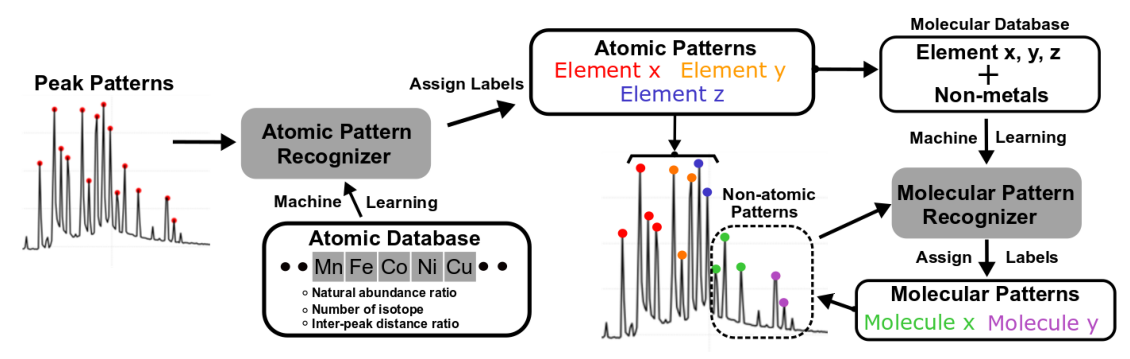

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = mpimg.imread(new_path+'/'+'Flowchart_new.png')
plt.figure(figsize=(20,40))
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

The end goal: 


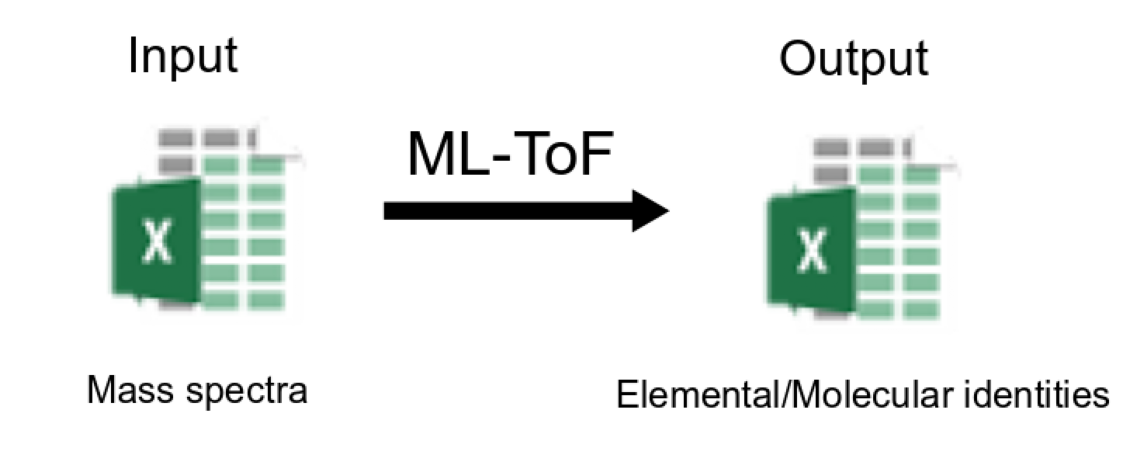

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = mpimg.imread(new_path+'/'+'flow.png')
plt.figure(figsize=(20,40))
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

#Detection of prominant peaks in a test spectra

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


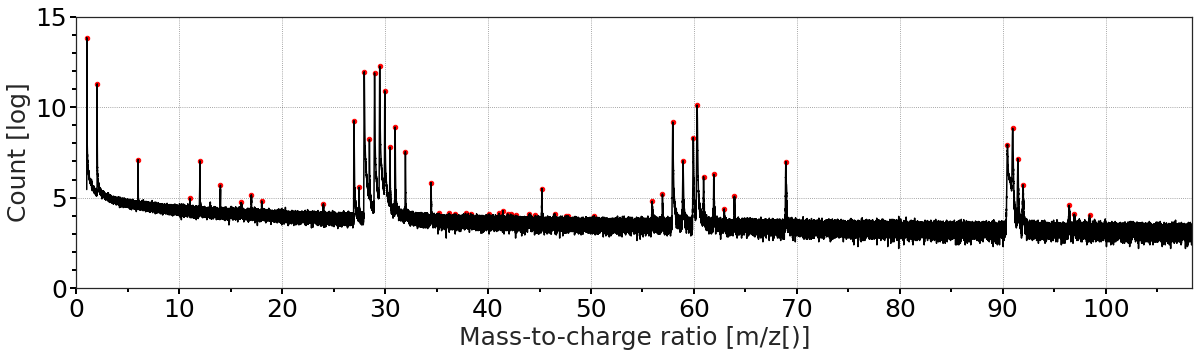

In [ ]:
from modules import peak_finder
distance=100
height=4
prominance = 1
mass_peaks = peak_finder(mass, distance, height, prominance)


In [ ]:
mass_peaks = mass_peaks.reset_index(drop=True)
MZ_ratio_round = atomic_pattern_recognizer.round_up_values_higher_charge((mass_peaks['m']))
df_test =  pd.DataFrame(MZ_ratio_round)
df_test.columns = ['Da']
MS_frame = pd.concat([df_test, mass_peaks['count']], axis=1)

In [ ]:
print(MS_frame)

       Da    count
0    1.00  1012876
1    2.00    79183
2    6.00     1215
3   11.00      144
4   12.00     1133
5   14.00      295
6   16.00      114
7   17.00      173
8   18.00      124
9   24.00      106
10  27.00    10369
11  27.50      265
12  28.00   154368
13  28.50     3693
14  29.00   145054
15  29.50   210975
16  30.00    54019
17  30.50     2396
18  31.00     7323
19  32.00     1894
20  34.50      342
21  35.25       63
22  37.00       63
23  36.75       61
24  38.00       63
25  38.33       62
26  40.00       60
27  41.00       63
28  41.50       73
29  42.00       61
30  42.00       60
31  42.67       56
32  44.00       60
33  44.50       56
34  45.25      246
35  46.50       62
36  47.50       55
37  47.75       55
38  50.33       55
39  56.00      121
40  57.00      182
41  58.00     9652
42  59.00     1141
43  60.00     4091
44  60.33    24508
45  61.00      473
46  62.00      539
47  63.00       80
48  64.00      161
49  69.00     1075
50  90.50     2792
51  91.00   

#Atomic pattern recognizer

In [ ]:
elements_three_or_more_peak, new_peaks, predictions, name_pair, all_elements_uncertain = atomic_pattern_recognizer.multi_peak_search(MS_frame, MZ_ratio_round)
elements_two_peak = atomic_pattern_recognizer.two_peak_search(MS_frame, MZ_ratio_round)
elements_one_peak = atomic_pattern_recognizer.one_peak_search(MS_frame, MZ_ratio_round)
elements_organic_peak = atomic_pattern_recognizer.organic_peak_search(MS_frame, MZ_ratio_round)
all_elements = elements_one_peak + elements_two_peak +  elements_organic_peak + elements_three_or_more_peak      
all_elements = pd.DataFrame(all_elements)
all_elements.columns = ['name']
all_elements = all_elements.name.unique().tolist()
all_elements = pd.DataFrame(all_elements)
all_elements.columns = ['name']


/content/gdrive/My Drive/scripts/modules.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['normalized_count'] = normalized_I


Element Ni is confirmed!
Element Ni is confirmed!
Element Ni2 is confirmed!
Element Ni_3P is confirmed!
Element Ni_3P is confirmed!
Element Ni_5P is confirmed!
Element Ni_3P2 is confirmed!
Element Ni_5P2 is confirmed!
Element Ni_4P2 is confirmed!
Element Fe_3P2 is confirmed!
there are peaks with uncertainies!
     Da  count
6  16.0    114
8  18.0    124


/content/gdrive/My Drive/scripts/modules.py:264: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['normalized_count'] = normalized_I


[100]
[98.89]
[100]


/content/gdrive/My Drive/scripts/modules.py:295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['normalized_count'] = normalized_I


[100]
[100]
[99.64]
[98.89]
[100]
     Da  count
6  16.0    114
7  17.0    173
8  18.0    124
['S2', 'csv']


/content/gdrive/My Drive/scripts/modules.py:324: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['normalized_count'] = normalized_I


     Da  count
4  12.0   1133
['C', 'csv']


/content/gdrive/My Drive/scripts/modules.py:324: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['normalized_count'] = normalized_I


     Da  count
6  16.0    114
8  18.0    124
['O', 'csv']


/content/gdrive/My Drive/scripts/modules.py:324: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['normalized_count'] = normalized_I


    Da  count
2  6.0   1215
['C2', 'csv']


/content/gdrive/My Drive/scripts/modules.py:324: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['normalized_count'] = normalized_I


     Da  count
5  14.0    295
['N', 'csv']


/content/gdrive/My Drive/scripts/modules.py:324: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['normalized_count'] = normalized_I


Identified elements

In [ ]:
print(all_elements)

      name
0       Co
1        C
2      Mn2
3      Co2
4       Al
5        N
6       C2
7        P
8       S2
9        O
10      Ni
11     Ni2
12   Ni_3P
13   Ni_5P
14  Ni_3P2
15  Ni_5P2
16  Ni_4P2
17  Fe_3P2


Example from human labelled spectra
there are four elements labelled by experts: Ni, Fe, Ta, Co
1. Human-assigned labels largely consitent with ML-ToF.
2. Peak @ 45 Da is unidentified. We gonna use molecular pattern recognizer to find out its identity. 

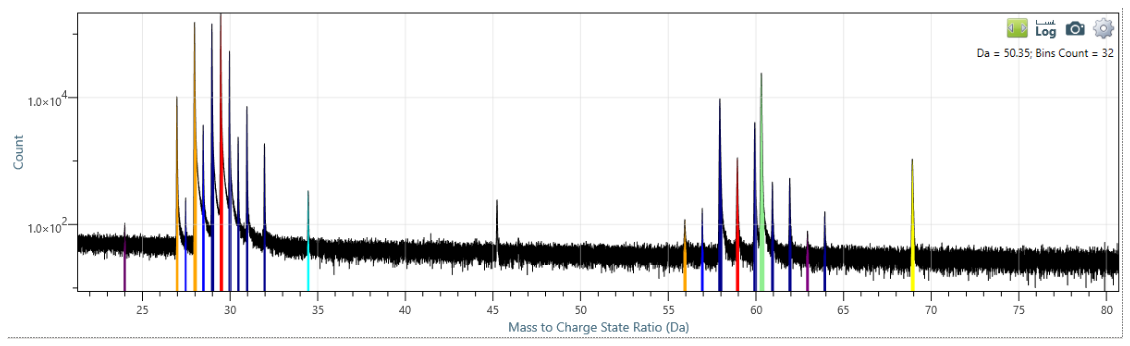

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = mpimg.imread(new_path+'/'+'example_IVAS.png')
plt.figure(figsize=(20,40))
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

#Investigation of standing-alone peak @45.25 Da
we assume that this peak consists of elements identified by atomic pattern recgonizer.  

In [ ]:
Ta = pd.DataFrame(data={'m':[180.0, 181.0],'Composition':[0.012, 99.988]}) 
Al = pd.DataFrame(data={'m':[27],'Composition':[100]}) 
P = pd.DataFrame(data={'m':[31],'Composition':[100]}) 

H = pd.DataFrame(data={'m':[1],'Composition':[100]})
C = pd.DataFrame(data={'m':[12.0, 13.0],'Composition':[98.89, 1.07]}) 
N = pd.DataFrame(data={'m':[14.0, 15.0],'Composition':[99.64, 0.36]}) 


   
metals=[P, Ta ,Al]
metal_names =['P','Ta' ,'Al']
nonmetals = [H, C, N]
nonmetals_names = ['H','C', 'N']

mz_lower_bound = 45
mz_upper_bound = 47
peak_of_interest = MS_frame.loc[(MS_frame['Da']>=mz_lower_bound) & (MS_frame['Da']<=mz_upper_bound)]

print(peak_of_interest)  

       Da  count
34  45.25    246
35  46.50     62


In [ ]:
good_molecules, composition_table = molecular_pattern_recognizer.find_good_molecules(peak_of_interest, metals, metal_names, nonmetals, nonmetals_names)


/content/gdrive/My Drive/scripts/modules.py:429: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['normalized_count'] = normalized_I
/content/gdrive/My Drive/scripts/modules.py:404: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  molecule['m'] /= charge
/content/gdrive/My Drive/scripts/modules.py:404: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [ ]:
print(composition_table)

     metal atoms  H  C  N  charges    AME metal_names
306            2  3  0  2        2  0.720           P
320            3  0  0  0        2  0.000           P
576            1  0  0  0        4  0.012          Ta
324            3  0  1  0        2  1.110          Al


We knew that the material does not cotain P a prior, so peak @ 45 Da is lablled as Ta4+! 